#### Importing the required libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


#### Loading the MNIST data

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [31]:
print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

60000 60000
10000 10000


In [32]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [33]:
print(y_train[0])

5


#### Data Preprocessing without Normalization

In [34]:
# CNN expects channel dimension
x_train_cnn1 = x_train.reshape(-1, 28, 28, 1)
x_test_cnn1 = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding labels
y_train_cat1 = to_categorical(y_train, 10)
y_test_cat1 = to_categorical(y_test, 10)

#### Data Preprocessing

In [50]:
# Normalize pixel values to [0, 1] as values are from 0 to 255
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# CNN expects channel dimension
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#### Reusable MLP Function

In [48]:
from tensorflow.keras import models, layers, optimizers

def build_mlp(optimizer='adam'):
    """
    Build a reusable MLP model with the specified optimizer.

    Architecture:
    - Flatten(784)
    - Dense(256) + BatchNorm + ReLU
    - Dense(128) + BatchNorm + ReLU
    - Dense(10) + Softmax
    """
    model = models.Sequential()

    # Input flatten layer
    model.add(layers.Flatten(input_shape=(28,28)))  # MNIST style input

    # Dense 256 + BN + ReLU
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Dense 128 + BN + ReLU
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


#### Reusable CNN Function

In [10]:
def build_cnn(activation="relu", optimizer="adam", dropout_rate=0.25, use_bn=False):
    model = models.Sequential()
    # Conv2D
    model.add(layers.Conv2D(32, (3,3), activation=activation, input_shape=(28,28,1)))
    # filter = 32, kernel size= 3x3, stride= default=(1,1), padding= default, output=26x26x32
    if use_bn:
        model.add(layers.BatchNormalization())
    # Conv2D
    model.add(layers.Conv2D(64, (3,3), activation=activation))
    if use_bn:
        model.add(layers.BatchNormalization())
    # filter = 64, kernel size= 3x3, stride= default=(1,1), padding= default, output=24x24x64
    # MaxPooling2D
    model.add(layers.MaxPooling2D((2,2)))
    # Dropout
    model.add(layers.Dropout(dropout_rate))
    # 3D feature maps to 1D vector
    model.add(layers.Flatten())
    # Fully Connected Layer( Dense )
    model.add(layers.Dense(128, activation=activation))
    # SoftMax class probabilities
    model.add(layers.Dense(10, activation="softmax"))

    model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


#### Train MLP with SGD

In [52]:
mlp_sgd = build_mlp(optimizer=optimizers.SGD(learning_rate=0.01))
history_sgd = mlp_sgd.fit(
    x_train_cnn, y_train_cat,
    epochs=50, batch_size=128,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6864 - loss: 1.1283 - val_accuracy: 0.8689 - val_loss: 1.6142
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9000 - loss: 0.3881 - val_accuracy: 0.9213 - val_loss: 0.3055
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9159 - loss: 0.3043 - val_accuracy: 0.9322 - val_loss: 0.2526
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9274 - loss: 0.2642 - val_accuracy: 0.9390 - val_loss: 0.2243
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9356 - loss: 0.2323 - val_accuracy: 0.9439 - val_loss: 0.2039
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9437 - loss: 0.2078 - val_accuracy: 0.9467 - val_loss: 0.1886
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9457 - loss: 0.1980 - val_accuracy: 0.9505 - val_loss: 0.1759
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9517 - loss: 0.1758 - val_accuracy: 0.

#### Train MLP with SGD  +Momentum

In [53]:
mlp_sgd_mom = build_mlp(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9))
history_sgd_mom = mlp_sgd_mom.fit(
    x_train_cnn, y_train_cat,
    epochs=50, batch_size=128,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8306 - loss: 0.5745 - val_accuracy: 0.6968 - val_loss: 1.3843
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9565 - loss: 0.1501 - val_accuracy: 0.9625 - val_loss: 0.1233
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9704 - loss: 0.1061 - val_accuracy: 0.9688 - val_loss: 0.0998
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0783 - val_accuracy: 0.9723 - val_loss: 0.0874
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9832 - loss: 0.0626 - val_accuracy: 0.9744 - val_loss: 0.0828
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9857 - loss: 0.0515 - val_accuracy: 0.9739 - val_loss: 0.0822
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0410 - val_accuracy: 0.9766 - val_loss: 0.0741
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0352 - val_accuracy: 0.

#### Train MLP with Adam

In [54]:
mlp_adam = build_mlp(optimizer=optimizers.Adam(learning_rate=0.001))
history_adam = mlp_adam.fit(
    x_train_cnn, y_train_cat,
    epochs=50, batch_size=128,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8795 - loss: 0.4146 - val_accuracy: 0.1802 - val_loss: 1.8897
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0778 - val_accuracy: 0.8100 - val_loss: 0.5926
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0448 - val_accuracy: 0.8604 - val_loss: 0.4193
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9907 - loss: 0.0324 - val_accuracy: 0.8687 - val_loss: 0.4229
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9930 - loss: 0.0227 - val_accuracy: 0.8956 - val_loss: 0.3485
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9945 - loss: 0.0180 - val_accuracy: 0.8837 - val_loss: 0.4208
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9951 - loss: 0.0167 - val_accuracy: 0.9118 - val_loss: 0.3025
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.

#### Train CNN with sigmoid

In [15]:
cnn_sigmoid = build_cnn(
    activation="sigmoid",
    optimizer=optimizers.SGD(learning_rate=0.01),
    dropout_rate=0.25
)

history_sigmoid = cnn_sigmoid.fit(
    x_train_cnn, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1015 - loss: 2.3146 - val_accuracy: 0.0892 - val_loss: 2.3089
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1003 - loss: 2.3101 - val_accuracy: 0.1135 - val_loss: 2.3028
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1047 - loss: 2.3070 - val_accuracy: 0.1135 - val_loss: 2.3031
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1042 - loss: 2.3047 - val_accuracy: 0.1135 - val_loss: 2.3017
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1078 - loss: 2.3042 - val_accuracy: 0.1028 - val_loss: 2.3027
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1053 - loss: 2.3035 - val_accuracy: 0.1028 - val_loss: 2.3017
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1083 - loss: 2.3032 - val_accuracy: 0.1135 - val_loss: 2.3028
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1099 - loss: 2.3030 - val_accuracy: 0

#### Train CNN with tanh

In [16]:
cnn_tanh = build_cnn(
    activation="tanh",
    optimizer=optimizers.SGD(learning_rate=0.01),
    dropout_rate=0.25
)

history_tanh = cnn_tanh.fit(
    x_train_cnn, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1108 - loss: 2.3018 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1132 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1148 - loss: 2.3008 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1108 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3007
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1120 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1142 - loss: 2.3007 - val_accuracy: 0.1135 - val_loss: 2.3005
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1168 - loss: 2.3001 - val_accuracy: 0.1135 - val_loss: 2.3006
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1124 - loss: 2.3006 - val_accuracy: 0

#### Train CNN with relu

In [17]:
cnn_relu = build_cnn(
    activation="relu",
    optimizer=optimizers.SGD(learning_rate=0.01),
    dropout_rate=0.25
)

history_relu = cnn_relu.fit(
    x_train_cnn, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1111 - loss: 2.3020 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1120 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1105 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3007
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1139 - loss: 2.3007 - val_accuracy: 0.1135 - val_loss: 2.3007
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1131 - loss: 2.3009 - val_accuracy: 0.1135 - val_loss: 2.3006
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1116 - loss: 2.3009 - val_accuracy: 0.1135 - val_loss: 2.3006
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1135 - loss: 2.3006 - val_accuracy: 0.1135 - val_loss: 2.3006
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1132 - loss: 2.3006 - val_accuracy: 0

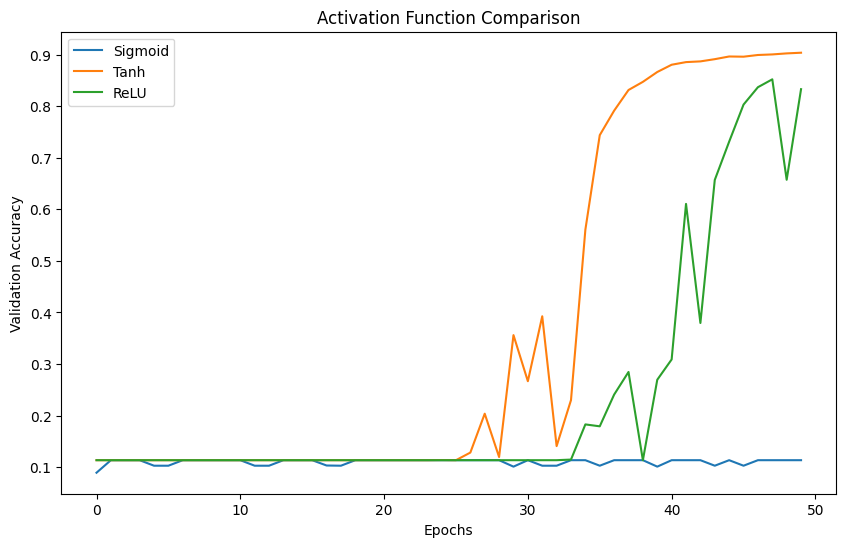

In [18]:
plt.figure(figsize=(10,6))

plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh')
plt.plot(history_relu.history['val_accuracy'], label='ReLU')

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Activation Function Comparison")
plt.legend()
plt.show()


Sigmoid fails to learn due to vanishing gradients, remaining near random accuracy. Tanh shows delayed but stable learning after sufficient epochs, achieving high accuracy. ReLU converges faster but exhibits noisy validation behavior due to dead neuron effects and sensitivity to SGD updates.

#### Selecting the best activation as tanh

In [19]:
cnn_tanh_sgd_momentum = build_cnn(
    activation="tanh",
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
    dropout_rate=0.25
)

history_tanh_sgd_momentum = cnn_tanh_sgd_momentum.fit(
    x_train_cnn, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.1107 - loss: 2.3023 - val_accuracy: 0.1499 - val_loss: 2.3012
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1166 - loss: 2.2995 - val_accuracy: 0.1135 - val_loss: 2.2925
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1671 - loss: 2.2766 - val_accuracy: 0.6562 - val_loss: 1.8657
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7447 - loss: 1.1126 - val_accuracy: 0.8799 - val_loss: 0.3974
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8825 - loss: 0.3964 - val_accuracy: 0.9084 - val_loss: 0.3177
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8964 - loss: 0.3433 - val_accuracy: 0.9166 - val_loss: 0.2896
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9043 - loss: 0.3162 - val_accuracy: 0.9222 - val_loss: 0.2685
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9139 - loss: 0.2838 - val_accuracy: 0

In [20]:
cnn_tanh_adam = build_cnn(
    activation="tanh",
    optimizer=optimizers.Adam(),
    dropout_rate=0.25
)

history_tanh_adam = cnn_tanh_adam.fit(
    x_train_cnn, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7228 - loss: 0.9025 - val_accuracy: 0.9401 - val_loss: 0.1986
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9429 - loss: 0.1882 - val_accuracy: 0.9600 - val_loss: 0.1348
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9627 - loss: 0.1262 - val_accuracy: 0.9680 - val_loss: 0.1113
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9725 - loss: 0.0953 - val_accuracy: 0.9708 - val_loss: 0.1032
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9753 - loss: 0.0840 - val_accuracy: 0.9741 - val_loss: 0.0870
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9808 - loss: 0.0650 - val_accuracy: 0.9759 - val_loss: 0.0840
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9827 - loss: 0.0585 - val_accuracy: 0.9779 - val_loss: 0.0758
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9865 - loss: 0.0478 - val_accuracy: 

#### Plotting tanh with all 3 optimizers

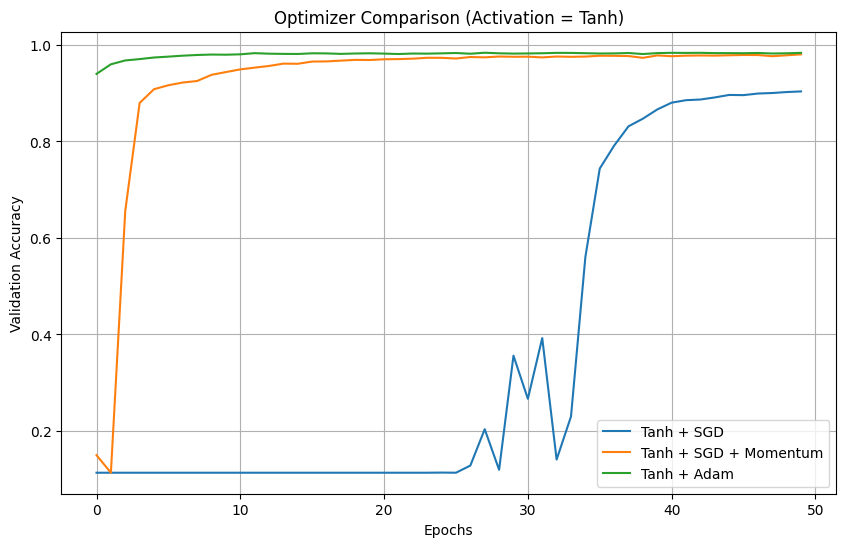

In [23]:
plt.figure(figsize=(10,6))

plt.plot(history_tanh.history['val_accuracy'], label='Tanh + SGD')
plt.plot(history_tanh_sgd_momentum.history['val_accuracy'], label='Tanh + SGD + Momentum')
plt.plot(history_tanh_adam.history['val_accuracy'], label='Tanh + Adam')

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Optimizer Comparison (Activation = Tanh)")
plt.legend()
plt.grid(True)
plt.show()


With the activation function fixed to Tanh, Adam converges significantly faster than SGD, while momentum improves SGD stability by accelerating gradient descent in consistent directions.

In [40]:
cnn_tanh_no_bn_no_do = build_cnn(
    activation="tanh",
    optimizer=optimizers.Adam(),
    dropout_rate=0.0,
    use_bn=False
)

history_tanh_no_bn_no_do = cnn_tanh_no_bn_no_do.fit(
    x_train_cnn1, y_train_cat1,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_cnn1, y_test_cat1),
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9136 - loss: 0.2820 - val_accuracy: 0.9815 - val_loss: 0.0538
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9871 - loss: 0.0451 - val_accuracy: 0.9847 - val_loss: 0.0470
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9940 - loss: 0.0243 - val_accuracy: 0.9860 - val_loss: 0.0470
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9956 - loss: 0.0174 - val_accuracy: 0.9864 - val_loss: 0.0453
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9961 - loss: 0.0160 - val_accuracy: 0.9853 - val_loss: 0.0439
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9830 - val_loss: 0.0518
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9845 - val_loss: 0.0485
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9950 - loss: 0.0173 - val_accuracy: 0

In [41]:
cnn_tanh_do_01 = build_cnn(
    activation="tanh",
    optimizer=optimizers.Adam(),
    dropout_rate=0.1,
    use_bn=False
)

history_tanh_do_01 = cnn_tanh_do_01.fit(
    x_train_cnn1, y_train_cat1,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_cnn1, y_test_cat1),
    verbose=1
)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9067 - loss: 0.3195 - val_accuracy: 0.9847 - val_loss: 0.0504
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9896 - loss: 0.0394 - val_accuracy: 0.9847 - val_loss: 0.0499
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9937 - loss: 0.0243 - val_accuracy: 0.9868 - val_loss: 0.0411
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9953 - loss: 0.0193 - val_accuracy: 0.9857 - val_loss: 0.0417
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9951 - loss: 0.0167 - val_accuracy: 0.9855 - val_loss: 0.0450
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9960 - loss: 0.0147 - val_accuracy: 0.9863 - val_loss: 0.0401
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9971 - loss: 0.0118 - val_accuracy: 0.9852 - val_loss: 0.0485
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9952 - loss: 0.0165 - val_accuracy: 0

In [42]:
cnn_tanh_bn_do_025 = build_cnn(
    activation="tanh",
    optimizer=optimizers.Adam(),
    dropout_rate=0.25,
    use_bn=True
)

history_tanh_bn_do_025 = cnn_tanh_bn_do_025.fit(
    x_train_cnn1, y_train_cat1,
    epochs=50,
    batch_size=128,
    validation_data=(x_test_cnn1, y_test_cat1),
    verbose=1
)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8700 - loss: 0.4616 - val_accuracy: 0.9738 - val_loss: 0.0908
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9788 - loss: 0.0744 - val_accuracy: 0.9823 - val_loss: 0.0598
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9840 - loss: 0.0571 - val_accuracy: 0.9782 - val_loss: 0.0679
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9848 - loss: 0.0493 - val_accuracy: 0.9842 - val_loss: 0.0531
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9860 - loss: 0.0448 - val_accuracy: 0.9845 - val_loss: 0.0507
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9875 - loss: 0.0411 - val_accuracy: 0.9845 - val_loss: 0.0519
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9847 - val_loss: 0.0480
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9893 - loss: 0.0344 - val_accuracy: 

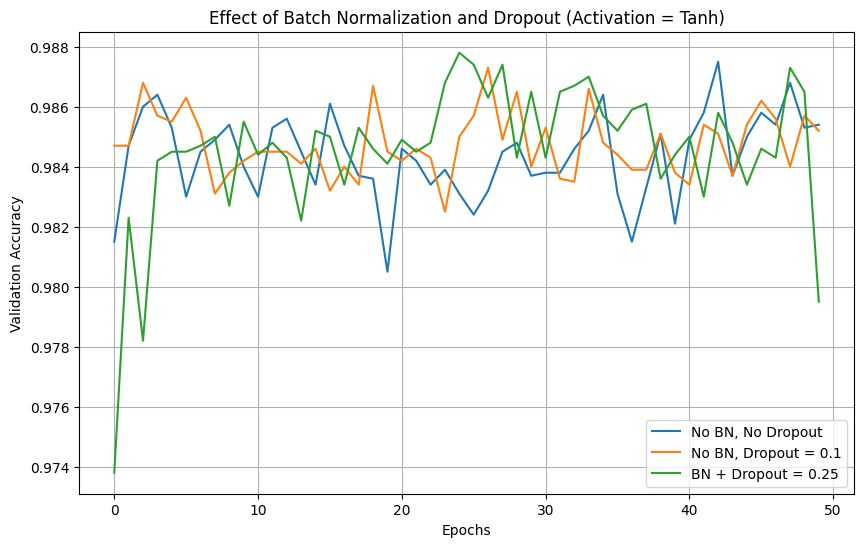

In [43]:
plt.figure(figsize=(10,6))

plt.plot(history_tanh_no_bn_no_do.history['val_accuracy'],
         label='No BN, No Dropout')

plt.plot(history_tanh_do_01.history['val_accuracy'],
         label='No BN, Dropout = 0.1')

plt.plot(history_tanh_bn_do_025.history['val_accuracy'],
         label='BN + Dropout = 0.25')

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Batch Normalization and Dropout (Activation = Tanh)")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
experiments = [
    ("Tanh + SGD", history_tanh),
    ("Tanh + SGDM", history_tanh_sgd_momentum),
    ("Tanh + Adam", history_tanh_adam),
    ("Sigmoid + SGD", history_sigmoid),
    ("ReLU + SGD", history_relu),
    ("MLP + SGD", history_sgd),
    ("MLP + SGD+Momentum", history_sgd_mom),
    ("MLP + Adam", history_adam)
]


#### A Table showing "Activation + Optimizer" combinations and their final test accuracy

In [56]:
import pandas as pd

data = []

for name, hist in experiments:
    final_test_acc = hist.history['val_accuracy'][-1]  # last epoch validation accuracy
    data.append([name, final_test_acc])

df = pd.DataFrame(data, columns=["Activation + Optimizer", "Final Test Accuracy"])
print(df)


  Activation + Optimizer  Final Test Accuracy
0             Tanh + SGD               0.9038
1            Tanh + SGDM               0.9806
2            Tanh + Adam               0.9837
3          Sigmoid + SGD               0.1135
4             ReLU + SGD               0.8331
5              MLP + SGD               0.9790
6     MLP + SGD+Momentum               0.9825
7             MLP + Adam               0.9821


#### Training and Testing accuracy plots

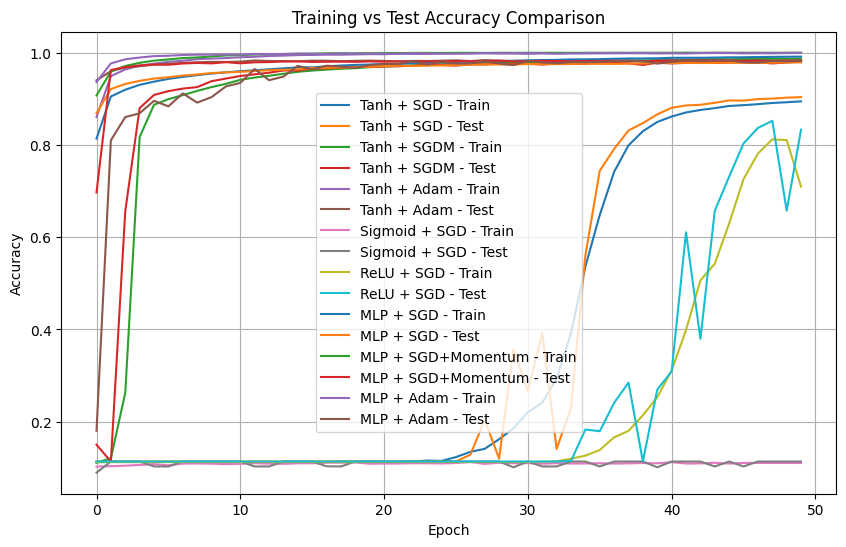

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for name, hist in experiments:
    # Training accuracy
    plt.plot(hist.history['accuracy'], label=f"{name} - Train")
    # Validation accuracy
    plt.plot(hist.history['val_accuracy'], label=f"{name} - Test")

plt.title("Training vs Test Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


#### Loss Curves

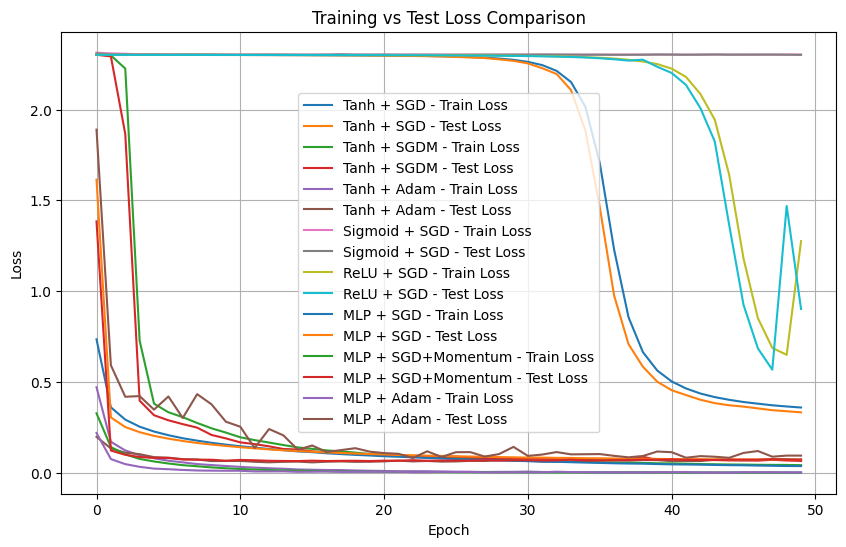

In [58]:
plt.figure(figsize=(10,6))
for name, hist in experiments:
    plt.plot(hist.history['loss'], label=f"{name} - Train Loss")
    plt.plot(hist.history['val_loss'], label=f"{name} - Test Loss")

plt.title("Training vs Test Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
